In [1]:
pip install sklearn

     |████████████████████████████████| 23.2 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 78.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=9b7e717c317451711cc0f998c475d6fa2dea8654a3b32a6a33337a291fb20c67
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

     |████████████████████████████████| 11.3 MB 4.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

In [30]:
#Komórka na importy
file_name = 'dane.csv'
model_type = 'DTR' # choose MLR for multi linear regression, KNN for KNeighbors Regression, RF for random forest regression,SVR for Support Vector Regression, DTR for Decision Tree Regression
split_size = 0.33  # proportions for train and test data e.g split_size = 0.33 so 77% of data is in train da
criterion,splitter = 'squared_error','best' #used when model_type is 'DTR'
#criterion{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”},
#The function to measure the quality of a split. Supported criteria are “squared_error” for the mean squared
#error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the
#mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement
#score for potential splits, “absolute_error” for the mean absolute error, which minimizes the L1 loss using the
#median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits.
#splitter{“best”, “random”}
#he strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

#Tu dodajcie te zmienne od których wasz model może zależeć (chodzi o hyperparamety)


In [31]:
# ujednolicenie zmiennych
df = pd.read_csv(file_name)
predictions = pd.DataFrame()
#Tymczasowy podział danych
from sklearn.model_selection import train_test_split
    
X, y = df.drop(columns=['y']).to_numpy(),df['y'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = split_size, random_state=1)

# Podział Danych za pomocą GA (Adrian)
#TODO
# proszę nazwij ostatecznie podział tak jak w tymczasowym podziale

#Model MLR (Paula)
#TODO
#predictions['MLR'] = y_pred

#Model KNN (Paula)
#TODO
#predictions['KNN'] = y_pred

# Model RF (Ada)
#TODO
#predictions['RF'] = y_pred

# Model SVR (Ada)
#TODO
#predictions['SVR'] = y_pred

# Model DTR (Michał)
def DTR_model(X_train,X_test,y_train,criterion1, splitter1):
    DTR = tree.DecisionTreeRegressor(criterion=criterion1,splitter= splitter1)
    DTR = DTR.fit(X_train, y_train)
    y_pred = DTR.predict(X_test)
    y_pred_train = DTR.predict(X_train)
    predictions['DTR'] = y_pred
    #predictions_train['DTR_train'] = y_pred_train

    return(DTR)

In [36]:
def leverage(X_test):
    X = []

    for i in range(len(X_test)):
        Y = [1]+[X_test[i][j] for j in range(len(X_test[i]))]
        X.append(Y)
    X = np.array(X)
    X = np.asmatrix(X)  
    XT = X.transpose()
    XX1 = np.linalg.inv(np.dot(XT,X))
    H = np.dot(np.dot(X,XX1),XT)
    hi = [np.asarray(H)[i][i] for i in range(len(np.asarray(H)))]
    return(hi)

def std_res(y_pred,y_test,hi):
    std_res = []
    for i in range(len(y_pred)):
        std_res.append(y_test[i]/(y_pred[i]*np.sqrt(1-hi[i])))
    return(std_res)

if(model_type == 'DTR'):
    model = DTR_model(X_train,X_test,y_train,criterion,splitter)
elif(model_type == ''):
    pass #zróbcie podobne dopiski tu i będzie dalej wszystko działać

from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
hi= leverage(X_test)
std_res1 = std_res(y_pred,y_test,hi)
hi_train = leverage(X_train)
std_res2 = std_res(y_pred_train,y_train,hi_train)
print('RMSE = ',mean_squared_error(y_test, y_pred,squared=False),' R^2 = ', r2_score(y_test,y_pred))


RMSE =  36.24210621046363  R^2 =  0.6468943299107048


Text(0, 0.5, 'Standardized Residuals')

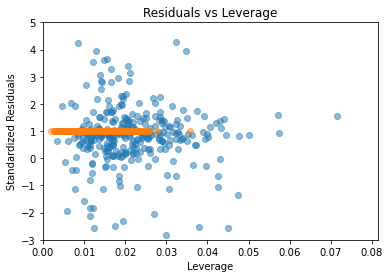

In [33]:
plot_lm_4 = plt.figure()
plt.scatter(hi, std_res1, alpha=0.5)
plt.scatter(hi_train, std_res2, alpha=0.5)
#sns.regplot(hi, std_res)#,scatter=False,ci=False,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_xlim(0, max(hi)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')


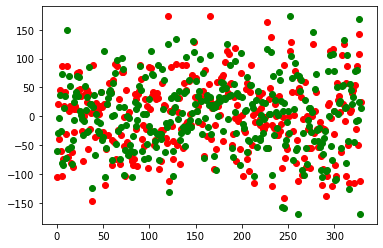

In [34]:
#Output (wykresiki Michał)
x = [i for i in range(len(y_pred))]
plt.scatter(x,y_pred, color = 'red')
plt.scatter(x,y_test, color = 'green')
plt.show()